# Initialization for prediction

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Autoreload allows the notebook to dynamically load code: if we update some helper functions outside of the notebook, we do not need to reload the notebook.
%load_ext autoreload
%autoreload 2

# All auxiliary code is in ../src
# code taken from: https://github.com/data-mining-UniPI/teaching24/tree/main/src
import sys
sys.path.append("./src/")

# Set style for seaborn
sns.set_theme(style="darkgrid")

# Other available themes:
# sns.set_theme(style="whitegrid")
# sns.set_theme(style="dark")
# sns.set_theme(style="white")
# sns.set_theme(style="ticks")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:

# Load datasets
cyclists_df = pd.read_pickle('cyclists_transformed.pkl')
races_df = pd.read_pickle('races_transformed.pkl')

# Display info
print("Cyclists DataFrame:")
# print(cyclists_df.info())
cyclists_df.head()
print("\nRaces DataFrame:")
# print(races_df.info())
races_df.head()

Cyclists DataFrame:

Races DataFrame:


_url            name  points  length  climb_total  \
0  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
1  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
2  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
3  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
4  tour-de-france/1978/stage-6  tour de france     100  162000         1101   

   startlist_quality  position           cyclist  cyclist_age  \
0               1241         0        sean-kelly           22   
1               1241         1  gerrie-knetemann           27   
2               1241         2    rene-bittinger           24   
3               1241         3    joseph-bruyere           30   
4               1241         4  sven-ake-nilsson           27   

                           cyclist_team  delta        day  year  
0  vini-ricordi-pinarello-sidermec-1986      0 1978-07-05  1978  
1                           norway-1987      0 1978-07-05  1978  
2                               unknown      0 1978-07-05  1978  
3              navigare-blue-storm-1993      0 1978-07-05  1978  
4                            spain-1991      0 1978-07-05  1978

In [59]:
races_merged_df = pd.merge(races_df, cyclists_df, left_on='cyclist', right_on='_url')
races_merged_df.head()

_url_x          name_x  points  length  climb_total  \
0  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
1  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
2  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
3  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
4  tour-de-france/1978/stage-6  tour de france     100  162000         1101   

   startlist_quality  position            cyclist  cyclist_age  \
0               1241         1   gerrie-knetemann           27   
1               1241         2     rene-bittinger           24   
2               1241         3     joseph-bruyere           30   
3               1241         4   sven-ake-nilsson           27   
4               1241         5  jacques-esclassan           30   

               cyclist_team  ...              name_y birth_year  weight  \
0               norway-1987  ...   gerrie  knetemann       1951      80   
1                   unknown  ...     rené  bittinger       1954      69   
2  navigare-blue-storm-1993  ...     joseph  bruyère       1948      75   
3                spain-1991  ...   sven-åke  nilsson       1951      63   
4   kelme-costa-blanca-2000  ...  jacques  esclassan       1948      60   

  height  nationality   bmi  races_participated  average_delta  \
0    185  netherlands  23.4                 252            298   
1    174       france  22.8                 146            239   
2    182      belgium  22.6                  33             78   
3    172       sweden  21.3                 145            129   
4    166       france  21.8                  47            368   

  average_climb_total  average_length  
0                1736          160777  
1                1571          171172  
2                1604          157898  
3                1814          168843  
4                1793          157851  

[5 rows x 24 columns]

## Utilities

In [60]:
from sklearn.metrics import classification_report
import pickle

def report_scores(labels, predictions):
    print(classification_report(labels, predictions, target_names=['Not Top-20', 'Top-20']))
    

def plot_confusion_matrix(test_labels, predictions, title='Confusion Matrix'):
    cm = confusion_matrix(test_labels, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Top-20', 'Top-20'], yticklabels=['Not Top-20', 'Top-20'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
    
    
    
class ModelResults:
    def __init__(self):
        self.results = []

    def add_result(self, model_name, train_set_predictions, validation_set_predictions, parameters):
        result = {
            'model_name': model_name,
            'train_set_predictions': train_set_predictions,
            'validation_set_predictions': validation_set_predictions,
            'parameters': parameters,
        }
        self.results.append(result)
        self.save_results('model_results.pkl')  # Save results after each change

    def get_results(self):
        return self.results

    def get_result_by_model(self, model_name):
        return [result for result in self.results if result['model_name'] == model_name]

    def __str__(self):
        return str(self.results)

    def save_results(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump(self.results, file)

    def load_results(self, filename):
        with open(filename, 'rb') as file:
            self.results = pickle.load(file)

In [61]:
model_results = ModelResults()
print(model_results.get_results())

[]


## Computing the labels

In [62]:
races_merged_df['is_top_20'] = (races_merged_df['position'] <= 20).astype(int)
races_merged_df.head()

_url_x          name_x  points  length  climb_total  \
0  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
1  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
2  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
3  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
4  tour-de-france/1978/stage-6  tour de france     100  162000         1101   

   startlist_quality  position            cyclist  cyclist_age  \
0               1241         1   gerrie-knetemann           27   
1               1241         2     rene-bittinger           24   
2               1241         3     joseph-bruyere           30   
3               1241         4   sven-ake-nilsson           27   
4               1241         5  jacques-esclassan           30   

               cyclist_team  ...  birth_year weight  height  nationality  \
0               norway-1987  ...        1951     80     185  netherlands   
1                   unknown  ...        1954     69     174       france   
2  navigare-blue-storm-1993  ...        1948     75     182      belgium   
3                spain-1991  ...        1951     63     172       sweden   
4   kelme-costa-blanca-2000  ...        1948     60     166       france   

    bmi  races_participated  average_delta  average_climb_total  \
0  23.4                 252            298                 1736   
1  22.8                 146            239                 1571   
2  22.6                  33             78                 1604   
3  21.3                 145            129                 1814   
4  21.8                  47            368                 1793   

  average_length  is_top_20  
0         160777          1  
1         171172          1  
2         157898          1  
3         168843          1  
4         157851          1  

[5 rows x 25 columns]

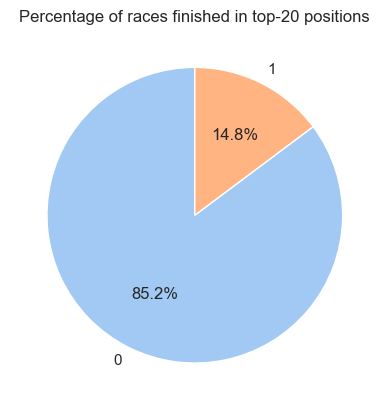

In [63]:
def plot_is_top_20_pie_chart():
    is_top_20_counts = races_merged_df['is_top_20'].value_counts()
    is_top_20_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title('Percentage of races finished in top-20 positions')
    plt.ylabel('')
    plt.show()
    
plot_is_top_20_pie_chart()

## Sampling

In [64]:
from sklearn.utils import resample

# Assuming races_merged_df is your DataFrame
# Separate the minority and majority classes
df_majority = races_merged_df[races_merged_df['is_top_20'] == False]
df_minority = races_merged_df[races_merged_df['is_top_20'] == True]

# Undersample the majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_minority),  # to match minority class
                                    random_state=123) # reproducible results

# Combine minority class with undersampled majority class
races_merged_df = pd.concat([df_minority, df_majority_undersampled])

races_merged_df['is_top_20'].value_counts()

is_top_20
1    49625
0    49625
Name: count, dtype: int64

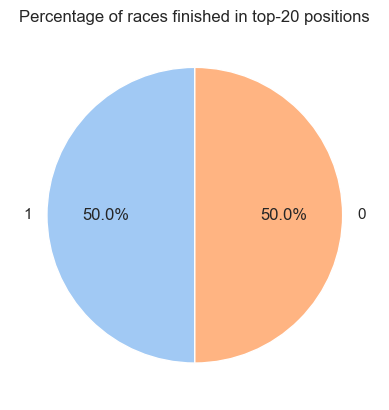

In [65]:
plot_is_top_20_pie_chart()

## Discretizing the data

The categorical column "nationality" is discretized.

In [66]:
# function to one-hot encode the variables
# input: the dataset and the list of variables' names to one-hot encode
def one_hot_encode_data(dataset, variables):
    return pd.get_dummies(dataset, columns=variables)

categorical_variables = ['nationality']

# Apply one-hot encoding to the dataset
races_merged_one_hot_encoded_df = one_hot_encode_data(races_merged_df, categorical_variables)

races_merged_one_hot_encoded_df.head()

_url_x          name_x  points  length  climb_total  \
0  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
1  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
2  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
3  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
4  tour-de-france/1978/stage-6  tour de france     100  162000         1101   

   startlist_quality  position            cyclist  cyclist_age  \
0               1241         1   gerrie-knetemann           27   
1               1241         2     rene-bittinger           24   
2               1241         3     joseph-bruyere           30   
3               1241         4   sven-ake-nilsson           27   
4               1241         5  jacques-esclassan           30   

               cyclist_team  ...  nationality_spain nationality_sweden  \
0               norway-1987  ...              False              False   
1                   unknown  ...              False              False   
2  navigare-blue-storm-1993  ...              False              False   
3                spain-1991  ...              False               True   
4   kelme-costa-blanca-2000  ...              False              False   

   nationality_switzerland nationality_ukraine nationality_united states  \
0                    False               False                     False   
1                    False               False                     False   
2                    False               False                     False   
3                    False               False                     False   
4                    False               False                     False   

   nationality_uruguay  nationality_uzbekistan  nationality_venezuela  \
0                False                   False                  False   
1                False                   False                  False   
2                False                   False                  False   
3                False                   False                  False   
4                False                   False                  False   

   nationality_yugoslavia  nationality_zimbabwe  
0                   False                 False  
1                   False                 False  
2                   False                 False  
3                   False                 False  
4                   False                 False  

[5 rows x 89 columns]

Now we have:
- races_merged_one_hot_encoded_df: the dataset, discretized

## Splitting for Training, Validation, and Test Sets

We will split our datasets into training, validation, and test sets.

The test set will consist of races from the year 2022 and onward, as requested in the project description. The remaining data will be split into training and validation sets. 

- The **training** set will be used to train the model
- The **validation** set will be used to tune and validate the model during the training process.
- The **test set** will be used at the end to evaluate the model's performance on unseen data.

In [67]:
from sklearn.model_selection import train_test_split

# Splits the data into training, validation, and test sets
def split_data(df, label_column):
    assert 'year' in df.columns, "The dataset must contain a 'year' column."
    train_df = df[df['year'] < 2022]
    test_df = df[df['year'] >= 2022]

    # Further split the training set into training and validation sets
    train_set, validation_set = train_test_split(train_df, test_size=0.2, random_state=42)

    # Extract labels
    train_labels = train_set[label_column]
    validation_labels = validation_set[label_column]
    test_labels = test_df[label_column]

    # Drop labels from the datasets
    train_set = train_set.drop(columns=[label_column])
    validation_set = validation_set.drop(columns=[label_column])
    test_df = test_df.drop(columns=[label_column])

    return train_set, validation_set, test_df, train_labels, validation_labels, test_labels

In [68]:
# Split the data
train_set, validation_set, test_set, train_labels, validation_labels, test_labels = split_data(races_merged_one_hot_encoded_df, 'is_top_20')

In [69]:
total_discretized = len(races_merged_one_hot_encoded_df)
print(f"Discretized Data - Training set: {len(train_set)} ({len(train_set) / total_discretized:.2%}), Validation set: {len(validation_set)} ({len(validation_set) / total_discretized:.2%}), Test set: {len(test_set)} ({len(test_set) / total_discretized:.2%})")

Discretized Data - Training set: 73464 (74.02%), Validation set: 18367 (18.51%), Test set: 7419 (7.48%)


## Selecting the columns

Selecting only the columns relevant and useful for prediction and dropping the rest.
Since we want to predict the outcome of the race, we will also drop the columns that are not available before the match starts.

In [ ]:
columns_to_drop = ['_url_x', 'name_x', '_url_y', 'name_y', 'cyclist', 'cyclist_team', 'day', 'birth_year', 'delta', 'position', 'year', 'height']

train_set.drop(columns=columns_to_drop, inplace=True)
validation_set.drop(columns=columns_to_drop, inplace=True)
test_set.drop(columns=columns_to_drop, inplace=True)

train_set.head()


points  length  climb_total  startlist_quality  cyclist_age  weight  \
269261     225  196200         1652                727           24      71   
12884      225  230000            0                874           28      69   
235493     275  256000         1900                887           33      73   
166693     100  248000         3500               1381           23      72   
306548     100  338000         2013               1632           25      62   

         bmi  races_participated  average_delta  average_climb_total  ...  \
269261  20.3                  53            371                 2143  ...   
12884   23.3                 287            179                 1366  ...   
235493  20.2                 319            398                 1467  ...   
166693  24.9                 181            182                 1155  ...   
306548  20.2                 205            408                 1539  ...   

        nationality_spain  nationality_sweden  nationality_switzerland  \
269261              False               False                    False   
12884               False               False                    False   
235493              False               False                    False   
166693              False               False                     True   
306548               True               False                    False   

        nationality_ukraine  nationality_united states  nationality_uruguay  \
269261                False                      False                False   
12884                 False                      False                False   
235493                False                      False                False   
166693                False                      False                False   
306548                False                      False                False   

        nationality_uzbekistan  nationality_venezuela  nationality_yugoslavia  \
269261                   False                  False                   False   
12884                    False                  False                   False   
235493                   False                  False                   False   
166693                   False                  False                   False   
306548                   False                  False                   False   

        nationality_zimbabwe  
269261                 False  
12884                  False  
235493                 False  
166693                 False  
306548                 False  

[5 rows x 76 columns]

In [71]:
# check that the sets do not contain the 'year' column
assert 'year' not in train_set.columns
assert 'year' not in validation_set.columns
assert 'year' not in test_set.columns

## Scaling

Some methods, as K-Nearest Neighbors and Neural Networks, require the data to be scaled.

In [72]:
scaler = sklearn.preprocessing.RobustScaler()

# Scale the datasets
train_set_scaled = scaler.fit_transform(train_set)
validation_set_scaled = scaler.transform(validation_set)
test_set_scaled = scaler.transform(test_set)

# Convert back to DataFrames
train_set_scaled = pd.DataFrame(train_set_scaled, columns=train_set.columns)
validation_set_scaled = pd.DataFrame(validation_set_scaled, columns=validation_set.columns)
test_set_scaled = pd.DataFrame(test_set_scaled, columns=test_set.columns)

train_set.head()

points  length  climb_total  startlist_quality  cyclist_age  weight  \
269261     225  196200         1652                727           24      71   
12884      225  230000            0                874           28      69   
235493     275  256000         1900                887           33      73   
166693     100  248000         3500               1381           23      72   
306548     100  338000         2013               1632           25      62   

         bmi  races_participated  average_delta  average_climb_total  ...  \
269261  20.3                  53            371                 2143  ...   
12884   23.3                 287            179                 1366  ...   
235493  20.2                 319            398                 1467  ...   
166693  24.9                 181            182                 1155  ...   
306548  20.2                 205            408                 1539  ...   

        nationality_spain  nationality_sweden  nationality_switzerland  \
269261              False               False                    False   
12884               False               False                    False   
235493              False               False                    False   
166693              False               False                     True   
306548               True               False                    False   

        nationality_ukraine  nationality_united states  nationality_uruguay  \
269261                False                      False                False   
12884                 False                      False                False   
235493                False                      False                False   
166693                False                      False                False   
306548                False                      False                False   

        nationality_uzbekistan  nationality_venezuela  nationality_yugoslavia  \
269261                   False                  False                   False   
12884                    False                  False                   False   
235493                   False                  False                   False   
166693                   False                  False                   False   
306548                   False                  False                   False   

        nationality_zimbabwe  
269261                 False  
12884                  False  
235493                 False  
166693                 False  
306548                 False  

[5 rows x 76 columns]

In [73]:
import pickle

prediction_datasets = {
    'train_set': train_set,
    'train_labels': train_labels,
    'validation_set': validation_set,
    
    'validation_labels': validation_labels,
    'test_set': test_set,
    'test_labels': test_labels,
    
    'train_set_scaled': train_set_scaled,
    'validation_set_scaled': validation_set_scaled,
    'test_set_scaled': test_set_scaled,
}

# Export the object using pickle
with open('prediction_datasets.pkl', 'wb') as f:
    pickle.dump(prediction_datasets, f)

print("Data has been exported to prediction_datasets.pkl")

Data has been exported to prediction_datasets.pkl


# Classification with KNN

In [74]:
knn_params_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    knn_params_grid,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=3
)


knn_random_search.fit(train_set_scaled, train_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.703 total time=   6.6s
[CV 4/5] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.711 total time=   6.9s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.697 total time=   7.0s
[CV 2/5] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.714 total time=   7.0s
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.695 total time=   7.2s
[CV 5/5] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.714 total time=   7.4s
[CV 1/5] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.713 total time=   7.0s
[CV 3/5] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.713 total time=   7.5s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.704 total time=   6.9s
[CV 1/5] END metric=euclidean, n_neighbors=12, weights=uniform;, score=0.714 t

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': range(1, 21),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=3)

## Evaluation

Evaluating the performance of this classifier wrt the training and validation sets.

In [75]:
best_knn = KNeighborsClassifier(**knn_random_search.best_params_)
best_knn.fit(train_set_scaled, train_labels)

training_predictions_knn = best_knn.predict(train_set_scaled)
validation_predictions_knn = best_knn.predict(validation_set_scaled)

In [76]:
print(f"KNN EVALUATION")

print(f"Best parameters found by grid search: {knn_random_search.best_params_}")
print(f"Their accuracy on the train set is: {knn_random_search.best_score_:.2f}")

print ("\n")

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, training_predictions_knn)
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, validation_predictions_knn)

KNN EVALUATION
Best parameters found by grid search: {'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan'}
Their accuracy on the train set is: 0.74


Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       1.00      1.00      1.00     36712
      Top-20       1.00      1.00      1.00     36752

    accuracy                           1.00     73464
   macro avg       1.00      1.00      1.00     73464
weighted avg       1.00      1.00      1.00     73464


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.77      0.72      0.74      9172
      Top-20       0.73      0.78      0.76      9195

    accuracy                           0.75     18367
   macro avg       0.75      0.75      0.75     18367
weighted avg       0.75      0.75      0.75     18367



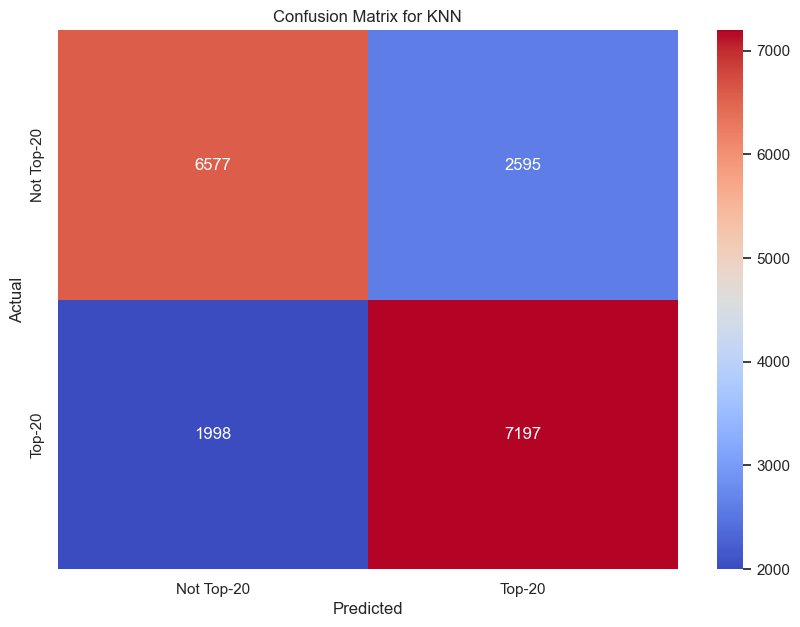

In [77]:
plot_confusion_matrix(validation_labels, validation_predictions_knn, title='Confusion Matrix for KNN')

In [78]:
#saving the results
model_results.add_result(
    model_name='KNN',
    train_set_predictions=training_predictions_knn,
    validation_set_predictions=validation_predictions_knn,
    parameters=knn_random_search.best_params_
)

# Classification with Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_set, train_labels)

GaussianNB()

In [80]:
train_predictions_gnb = gnb.predict(train_set)
validation_predictions_gnb = gnb.predict(validation_set)

In [81]:
print(f"GNB EVALUATION")

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, train_predictions_gnb)
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, validation_predictions_gnb)

GNB EVALUATION
Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       0.62      0.66      0.64     36712
      Top-20       0.63      0.59      0.61     36752

    accuracy                           0.62     73464
   macro avg       0.63      0.62      0.62     73464
weighted avg       0.63      0.62      0.62     73464


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.62      0.65      0.64      9172
      Top-20       0.63      0.61      0.62      9195

    accuracy                           0.63     18367
   macro avg       0.63      0.63      0.63     18367
weighted avg       0.63      0.63      0.63     18367



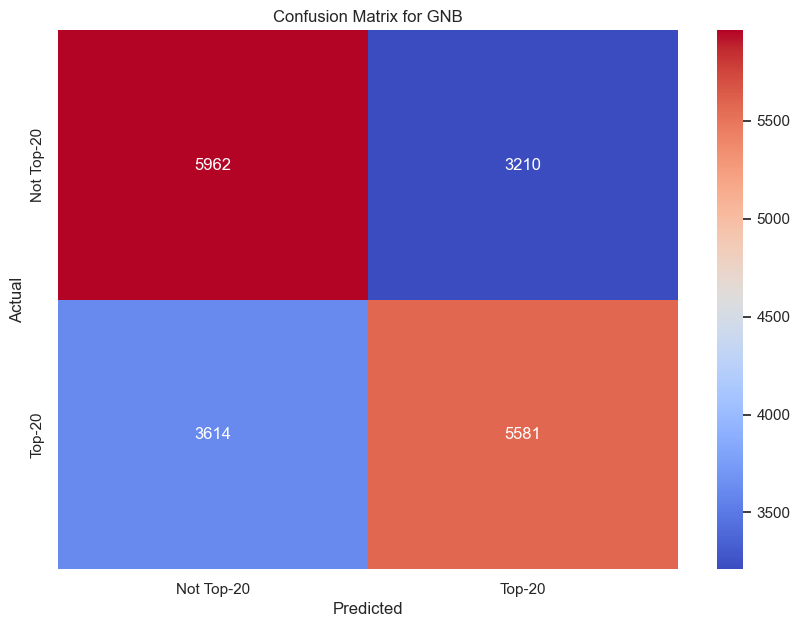

In [82]:
plot_confusion_matrix(validation_labels, validation_predictions_gnb, title='Confusion Matrix for GNB')

In [83]:
#saving the results
model_results.add_result(
    model_name='GNB',
    train_set_predictions=train_predictions_gnb,
    validation_set_predictions=validation_predictions_gnb,
    parameters=None
)

# Classification with Rule-Based (RIPPER)

In [84]:
import wittgenstein as lw
from sklearn.model_selection import RandomizedSearchCV

# Initialize the RIPPER classifier
ripper_classifier = lw.RIPPER()

# Define the parameter grid for RandomizedSearchCV
ripper_params_grid = {
    'prune_size': [0.3, 0.4, 0.5],
    'k': [1, 3, 5]
}

# Initialize RandomizedSearchCV with the RIPPER classifier and parameter grid
random_search_ripper = RandomizedSearchCV(ripper_classifier, ripper_params_grid, n_iter=5, cv=3, n_jobs=-1, verbose=3, random_state=42)

# Fit the model to the training data
try:
    random_search_ripper.fit(train_set, train_labels)
    print("Randomized search completed successfully.")
except Exception as e:
    print(f"An error occurred during randomized search: {e}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 2/3] END ...............k=1, prune_size=0.4;, score=0.591 total time= 5.0min
[CV 2/3] END ...............k=5, prune_size=0.4;, score=0.575 total time= 5.6min
[CV 3/3] END ...............k=1, prune_size=0.4;, score=0.577 total time= 6.3min
[CV 2/3] END ...............k=3, prune_size=0.5;, score=0.600 total time= 8.7min
[CV 1/3] END ...............k=1, prune_size=0.4;, score=0.595 total time= 9.2min
[CV 3/3] END ...............k=5, prune_size=0.4;, score=0.600 total time=10.0min
[CV 1/3] END ...............k=5, prune_size=0.4;, score=0.592 total time=10.3min
[CV 1/3] END ...............k=3, prune_size=0.5;, score=0.595 total time=13.4min
[CV 1/3] END ...............k=1, prune_size=0.3;, score=0.606 total time= 9.0min
[CV 3/3] END ...............k=3, prune_size=0.5;, score=0.600 total time=10.6min
[CV 2/3] END ...............k=1, prune_size=0.3;, score=0.615 total time= 9.5min
[CV 3/3] END ...............k=5, prune_size=0.5;,

In [85]:
best_ripper = lw.RIPPER(**random_search_ripper.best_params_)
best_ripper.fit(train_set, train_labels)

training_predictions_ripper = best_ripper.predict(train_set)
validation_predictions_ripper = best_ripper.predict(validation_set)

In [86]:
print("RIPPER EVALUATION")

print(f"Best parameters found by grid search: {random_search_ripper.best_params_}")
print(f"Their accuracy on the train set is: {random_search_ripper.best_score_:.2f}")
print ("\n")

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, training_predictions_ripper)
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, validation_predictions_ripper)

RIPPER EVALUATION
Best parameters found by grid search: {'prune_size': 0.3, 'k': 1}
Their accuracy on the train set is: 0.61


Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       0.55      0.97      0.71     36712
      Top-20       0.88      0.22      0.35     36752

    accuracy                           0.59     73464
   macro avg       0.72      0.59      0.53     73464
weighted avg       0.72      0.59      0.53     73464


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.55      0.97      0.70      9172
      Top-20       0.87      0.23      0.36      9195

    accuracy                           0.59     18367
   macro avg       0.71      0.60      0.53     18367
weighted avg       0.71      0.59      0.53     18367



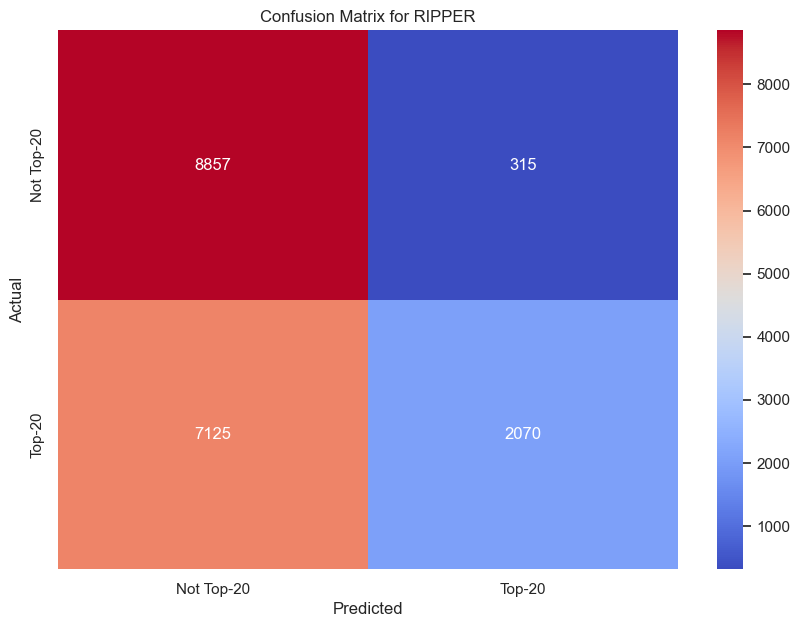

In [87]:
plot_confusion_matrix(validation_labels, validation_predictions_ripper, title='Confusion Matrix for RIPPER')

Visualizing the rules extracted by RIPPER.

In [88]:
best_ripper.out_model()

[[climb_total=<416.0 ^ startlist_quality=<623.0 ^ average_delta=<189.0 ^ nationality_spain=False ^ points=<50.0 ^ average_length=>181757.0] V
[climb_total=<416.0 ^ startlist_quality=<623.0 ^ average_delta=<189.0 ^ points=<50.0 ^ nationality_spain=False ^ nationality_belgium=False ^ nationality_italy=False] V
[climb_total=<416.0 ^ startlist_quality=<623.0 ^ average_delta=189.0-255.0 ^ average_length=172467.0-175689.0 ^ nationality_france=False ^ nationality_switzerland=False ^ nationality_spain=False] V
[climb_total=<416.0 ^ startlist_quality=<623.0 ^ average_length=>181757.0 ^ points=<50.0 ^ nationality_germany=False] V
[climb_total=<416.0 ^ startlist_quality=<623.0 ^ average_delta=<189.0 ^ points=>100.0 ^ length=216000.0-240000.0] V
[climb_total=<416.0 ^ startlist_quality=<623.0 ^ average_delta=189.0-255.0 ^ nationality_spain=False ^ points=<50.0 ^ nationality_france=True ^ weight=63.0-65.0] V
[climb_total=<416.0 ^ startlist_quality=<623.0 ^ average_delta=<189.0 ^ length=>240000.0] V


Visualizing some of the explanations for the predictions made by RIPPER.

In [89]:
# Get some predictions with reasons
outcome, reasons = best_ripper.predict(train_set[:100], give_reasons=True)

# DataFrame to display the results
ripper_reasons_df = pd.DataFrame({
    'Prediction': outcome,
    'Reason': reasons
})


# exclude the rows where the prediction is 'False'
ripper_reasons_df = ripper_reasons_df[ripper_reasons_df['Prediction']]
ripper_reasons_df

Prediction                                             Reason
5         True  [[average_delta=189.0-255.0^climb_total=>3794.0]]
7         True  [[climb_total=<416.0^average_delta=<189.0^star...
15        True  [[climb_total=<416.0^average_delta=189.0-255.0...
25        True  [[climb_total=<416.0^average_delta=189.0-255.0...
28        True  [[climb_total=<416.0^startlist_quality=<623.0^...
36        True  [[climb_total=<416.0^startlist_quality=<623.0^...
40        True  [[average_delta=189.0-255.0^climb_total=2890.0...
47        True  [[climb_total=<416.0^startlist_quality=<623.0^...
51        True  [[climb_total=<416.0^average_delta=<189.0^star...
56        True  [[climb_total=<416.0^average_delta=189.0-255.0...
68        True  [[climb_total=<416.0^average_delta=<189.0^aver...
73        True  [[climb_total=<416.0^average_delta=189.0-255.0...
77        True  [[climb_total=<416.0^average_length=>181757.0^...
85        True  [[climb_total=<416.0^startlist_quality=<623.0^...
86        True  [[climb_total=<416.0^startlist_quality=<623.0^...
91        True  [[climb_total=<416.0^average_delta=<189.0^aver...

In [90]:
#saving the results
model_results.add_result(
    model_name='RIPPER',
    train_set_predictions=training_predictions_ripper,
    validation_set_predictions=validation_predictions_ripper,
    parameters=random_search_ripper.best_params_,
)

# Classification with Decision Trees

In [91]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 4, 5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
dt = tree.DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit to the data
grid_search_dt.fit(train_set, train_labels)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best cross-validation score: ", grid_search_dt.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.1s
[CV] END criterion=gini, ma

/Users/ema/projects/dm-project/venv/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score:  0.6741533650998013


## Evaluation

In [92]:
best_dt = grid_search_dt.best_estimator_

# Export the decision tree model using pickle
with open('best_decision_tree_model.pkl', 'wb') as f:
    pickle.dump(best_dt, f)

print("Decision tree model has been exported to best_decision_tree_model.pkl")

Decision tree model has been exported to best_decision_tree_model.pkl


In [93]:
training_predictions_dt = best_dt.predict(train_set)
validation_predictions_dt = best_dt.predict(validation_set)

In [94]:
print(f"DT EVALUATION")

print(f"Best parameters found by grid search: {grid_search_dt.best_params_}")
print(f"Their accuracy on the train set is: {grid_search_dt.best_score_:.2f}")
print ("\n")

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, training_predictions_dt)
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, validation_predictions_dt)

DT EVALUATION
Best parameters found by grid search: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Their accuracy on the train set is: 0.67


Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       0.67      0.73      0.70     36712
      Top-20       0.70      0.63      0.67     36752

    accuracy                           0.68     73464
   macro avg       0.68      0.68      0.68     73464
weighted avg       0.68      0.68      0.68     73464


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.67      0.73      0.70      9172
      Top-20       0.70      0.64      0.67      9195

    accuracy                           0.68     18367
   macro avg       0.68      0.68      0.68     18367
weighted avg       0.68      0.68      0.68     18367



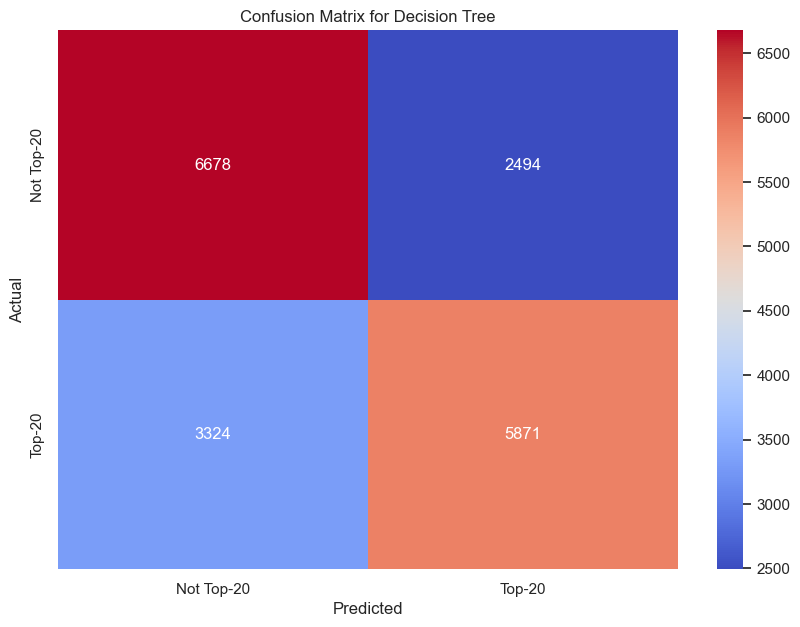

In [95]:
plot_confusion_matrix(validation_labels, validation_predictions_dt, title='Confusion Matrix for Decision Tree')

In [96]:
#saving the results
model_results.add_result(
    model_name='Decision Tree',
    train_set_predictions=training_predictions_dt,
    validation_set_predictions=validation_predictions_dt,
    parameters=grid_search_dt.best_params_,
)

## Visualize the Decision Tree

In [97]:
import os
os.environ["PATH"] += os.pathsep + '/opt/homebrew/Cellar/graphviz/12.2.1/bin'

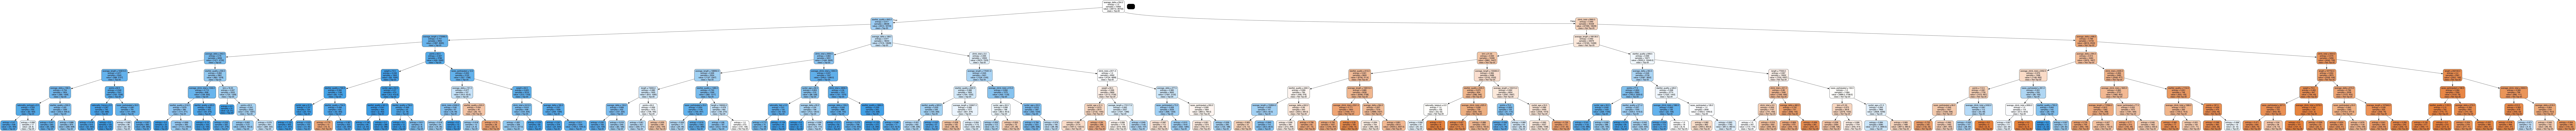

In [98]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(best_dt, out_file=None,
                                feature_names=list(train_set.columns),
                                class_names=['Not Top-20', 'Top-20'],
                                filled=True, rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Classification with Neural Networks (keras)

In [99]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [100]:
keras_model = tf.keras.Sequential([
    Input(shape=(train_set_scaled.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

keras_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

keras_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         9,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,225 (79.00 KB)

 Trainable params: 20,225 (79.00 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
train_set_numpy = train_set_scaled.to_numpy().astype(np.float32)
validation_set_numpy = validation_set_scaled.to_numpy().astype(np.float32)

train_labels_numpy = train_labels.to_numpy().astype(np.float32)
validation_labels_numpy = validation_labels.to_numpy().astype(np.float32)

test_set_numpy = test_set_scaled.to_numpy().astype(np.float32)
test_labels_numpy = test_labels.to_numpy().astype(np.float32)

train_set_numpy

array([[ 2.9       ,  0.28421053,  0.1796289 , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.9       ,  0.877193  , -0.4725622 , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.9       ,  1.3333334 ,  0.2775365 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.6       , -0.24912281,  0.12949072, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.4       , -0.7280702 ,  0.01381761, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.21052632, -0.05132254, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

We tried higher values for the number of epochs, but the results were not improving, since the loss has an asymptotic behavior. So we decided to keep the number of epochs at 50.

In [102]:

keras_history = keras_model.fit(train_set_numpy, train_labels_numpy, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - auc_1: 0.6896 - binary_accuracy: 0.6359 - loss: 0.7352 - precision_1: 0.6470 - recall_1: 0.5983 - val_auc_1: 0.7602 - val_binary_accuracy: 0.6870 - val_loss: 0.6120 - val_precision_1: 0.6867 - val_recall_1: 0.6983
Epoch 2/50
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - auc_1: 0.7466 - binary_accuracy: 0.6789 - loss: 0.6181 - precision_1: 0.6897 - recall_1: 0.6512 - val_auc_1: 0.7664 - val_binary_accuracy: 0.6907 - val_loss: 0.5975 - val_precision_1: 0.6890 - val_recall_1: 0.7056
Epoch 3/50
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - auc_1: 0.7530 - binary_accuracy: 0.6862 - loss: 0.6074 - precision_1: 0.6937 - recall_1: 0.6649 - val_auc_1: 0.7649 - val_binary_accuracy: 0.6904 - val_loss: 0.5990 - val_precision_1: 0.6798 - val_recall_1: 0.7305
Epoch 4/50
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - auc_1: 0.7577 - binary_accuracy: 0.6888 - loss: 0.6037 - precision_1: 0.6954 - recall_1: 0.6717 - val_auc_1: 0.7692 - val_bina

In [103]:
# Save the Keras model using the native Keras format
keras_model.save('keras_model.keras')
print("Keras model has been exported to keras_model.keras")

Keras model has been exported to keras_model.keras


## Evaluation

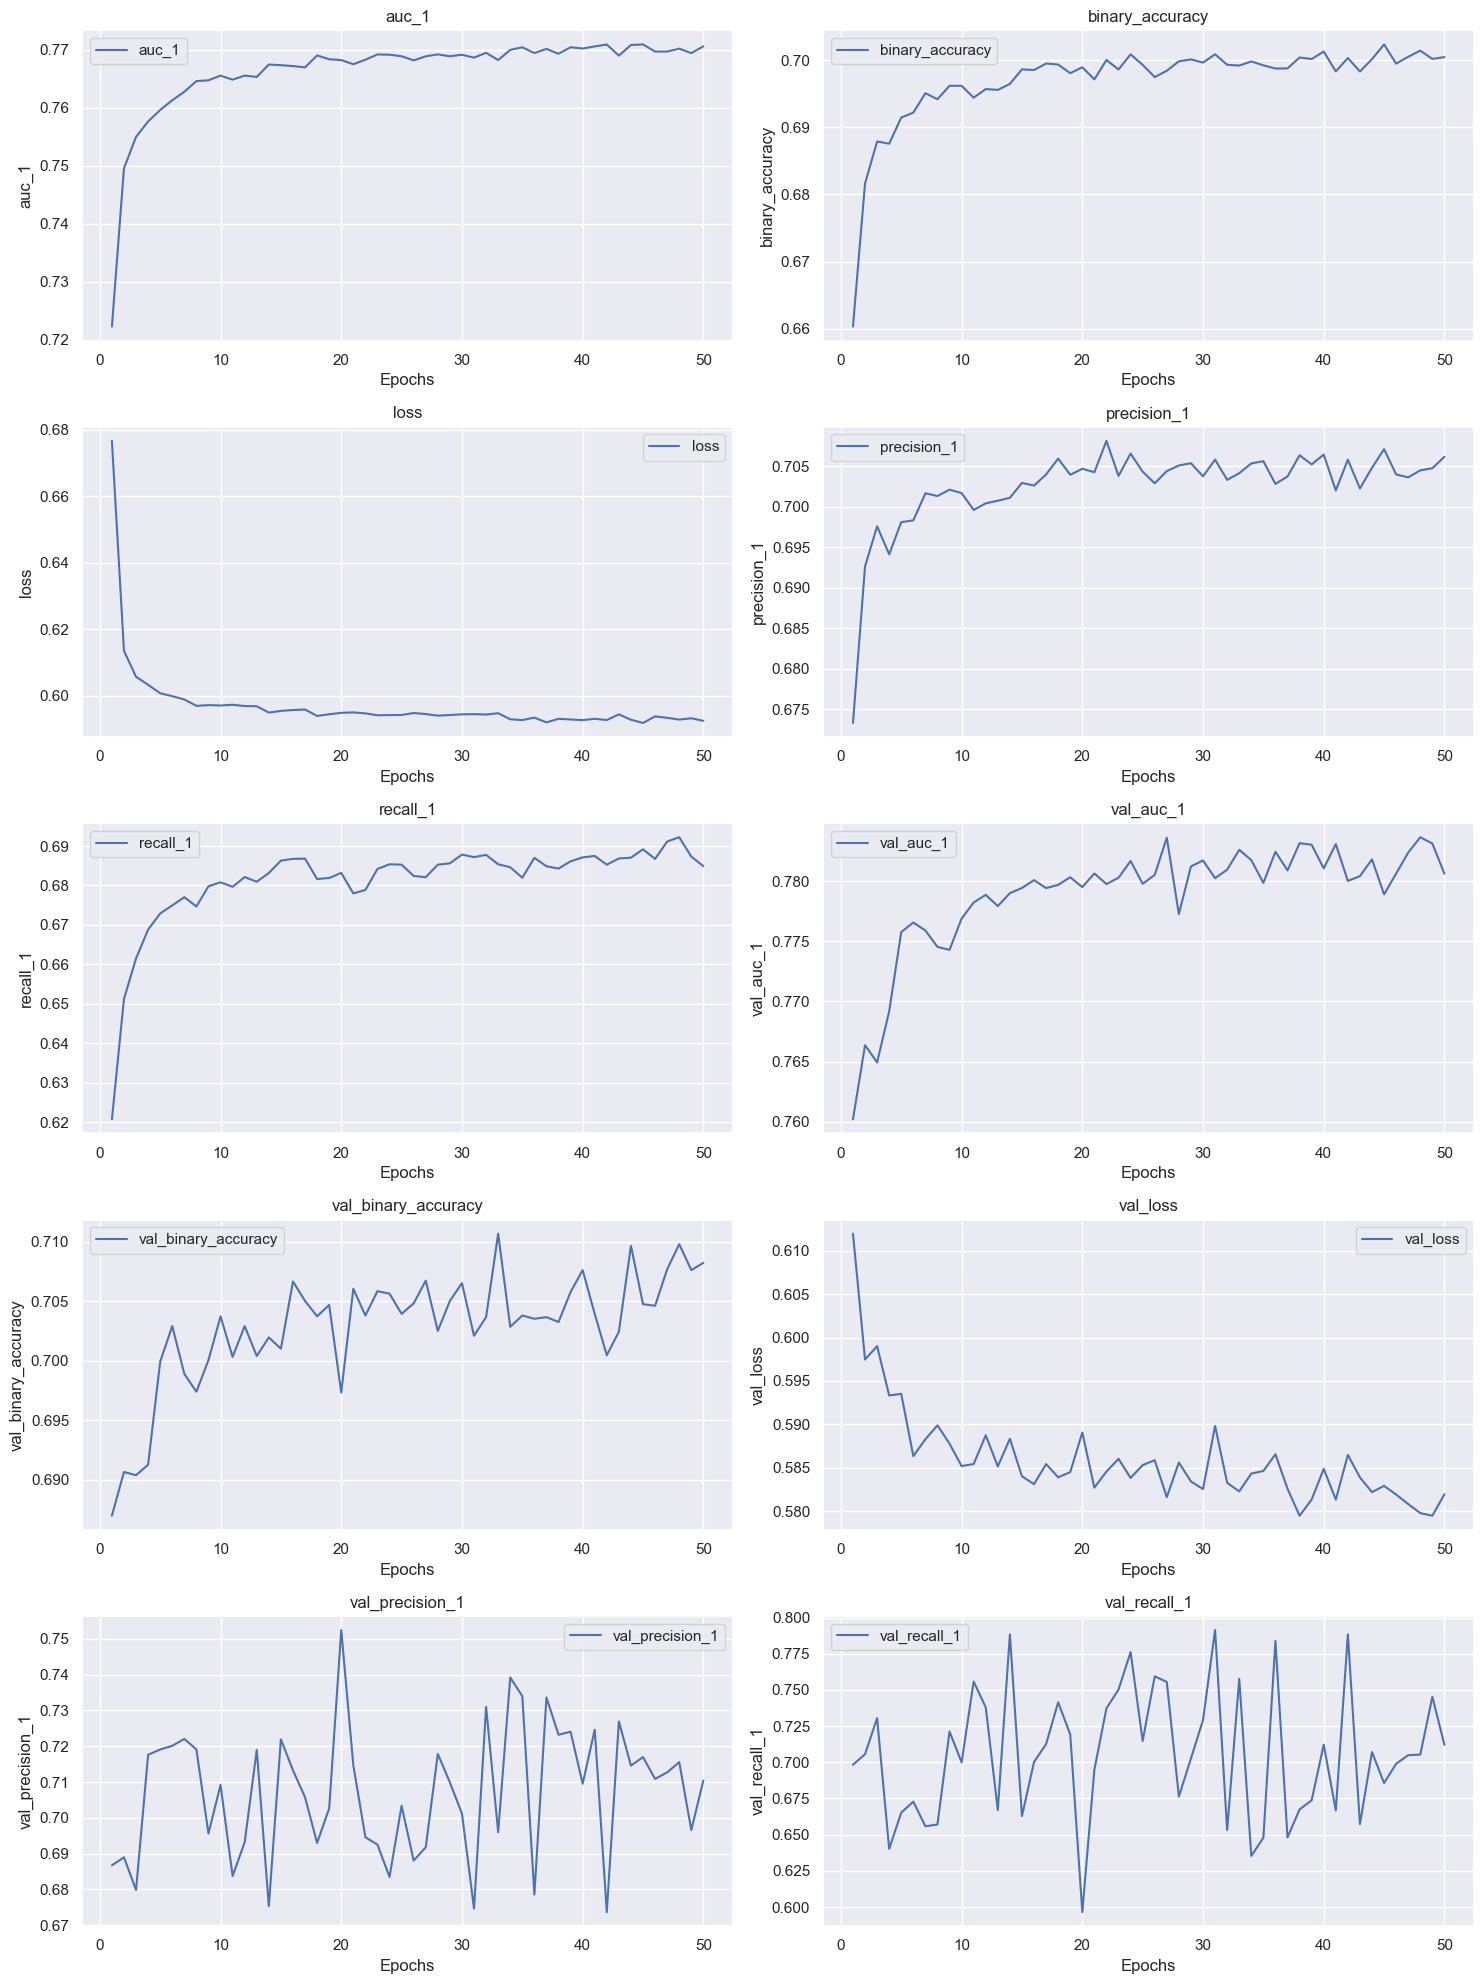

In [104]:
# Get all metrics from keras_history
keras_metrics = {metric: values for metric, values in keras_history.history.items()}

# Sort the metrics alphabetically
sorted_metrics = dict(sorted(keras_metrics.items()))

# Plotting all metrics
fig, axs = plt.subplots(len(sorted_metrics) // 2, 2, figsize=(15, 20))

for i, (metric, values) in enumerate(sorted_metrics.items()):
    ax = axs[i // 2, i % 2]
    ax.plot(range(1, len(values) + 1), values, label=metric)
    ax.set_title(metric)
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric)
    ax.legend()

plt.tight_layout()
plt.show()


In [105]:
training_predictions_keras = keras_model.predict(train_set_numpy)
validation_predictions_keras = keras_model.predict(validation_set_numpy)

2296/2296 ━━━━━━━━━━━━━━━━━━━━ 1s 245us/step
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


In [106]:
validation_predictions_keras

array([[0.6993581 ],
       [0.72630143],
       [0.20725113],
       ...,
       [0.6059495 ],
       [0.26988214],
       [0.9129727 ]], dtype=float32)

In [107]:
# Threshold the predictions to convert them to binary values
binary_training_predictions_keras = (training_predictions_keras > 0.5).astype(int)
binary_validation_predictions_keras = (validation_predictions_keras > 0.5).astype(int)

print(f"KERAS EVALUATION")
print ("\n")

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, binary_training_predictions_keras)
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, binary_validation_predictions_keras)

KERAS EVALUATION


Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       0.71      0.72      0.72     36712
      Top-20       0.72      0.71      0.71     36752

    accuracy                           0.72     73464
   macro avg       0.72      0.72      0.72     73464
weighted avg       0.72      0.72      0.72     73464


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.72      0.72      0.72      9172
      Top-20       0.72      0.73      0.72      9195

    accuracy                           0.72     18367
   macro avg       0.72      0.72      0.72     18367
weighted avg       0.72      0.72      0.72     18367



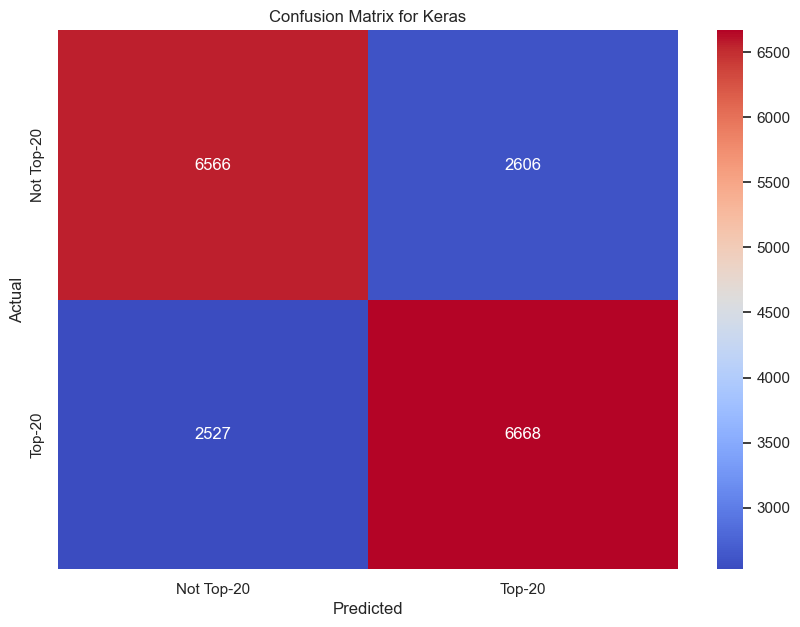

In [108]:
plot_confusion_matrix(validation_labels, binary_validation_predictions_keras, title='Confusion Matrix for Keras')

In [109]:
#saving the results
model_results.add_result(
    model_name='Keras',
    train_set_predictions=binary_training_predictions_keras,
    validation_set_predictions=binary_validation_predictions_keras,
    parameters=None
)

# Comparison and conclusions

In [110]:
# visualize the results

model_results.get_results()
ripper_reasons_df = pd.DataFrame(model_results.get_results())
ripper_reasons_df

model_name                              train_set_predictions  \
0            KNN  [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...   
1            GNB  [1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, ...   
2         RIPPER  [False, False, False, False, False, True, Fals...   
3  Decision Tree  [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...   
4          Keras  [[1], [1], [1], [1], [0], [1], [1], [1], [0], ...   

                          validation_set_predictions  \
0  [1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, ...   
1  [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, ...   
2  [False, False, False, False, False, False, Fal...   
3  [1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, ...   
4  [[1], [1], [0], [0], [0], [1], [1], [1], [0], ...   

                                          parameters  
0  {'weights': 'distance', 'n_neighbors': 20, 'me...  
1                                               None  
2                        {'prune_size': 0.3, 'k': 1}  
3  {'criterion': 'entropy', 'max_depth': 7, 'min_...  
4                                               None

In [111]:
model_results.get_results()[0]

{'model_name': 'KNN',
 'train_set_predictions': array([1, 1, 1, ..., 0, 1, 1]),
 'validation_set_predictions': array([1, 1, 0, ..., 1, 0, 1]),
 'parameters': {'weights': 'distance',
  'n_neighbors': 20,
  'metric': 'manhattan'}}

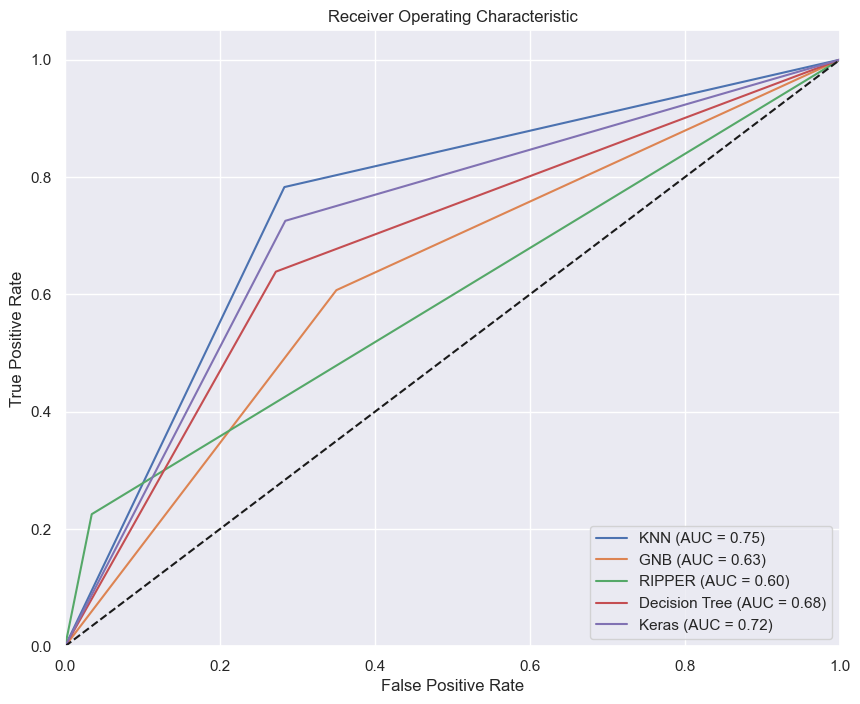

In [112]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for result in model_results.get_results():
    model_name = result['model_name']
    validation_predictions = result['validation_set_predictions']
    
    # Compute ROC curve and AUC for validation set
    fpr_val, tpr_val, _ = roc_curve(validation_labels, validation_predictions)
    roc_auc_val = auc(fpr_val, tpr_val)
    
    # Plot ROC curve for validation set
    plt.plot(fpr_val, tpr_val, label=f'{model_name} (AUC = {roc_auc_val:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


### Final evaluation on the test set

In [113]:
test_predictions_knn = best_knn.predict(test_set_scaled)
print("\nReport of the performance of the KNN model on the TEST set:")
report_scores(test_labels, test_predictions_knn)


Report of the performance of the KNN model on the TEST set:
              precision    recall  f1-score   support

  Not Top-20       0.65      0.77      0.70      3741
      Top-20       0.71      0.57      0.63      3678

    accuracy                           0.67      7419
   macro avg       0.68      0.67      0.67      7419
weighted avg       0.68      0.67      0.67      7419



In [114]:
test_predictions_dt = best_dt.predict(test_set)
print("\nReport of the performance of the DT model on the TEST set:")
report_scores(test_labels, test_predictions_dt)


Report of the performance of the DT model on the TEST set:
              precision    recall  f1-score   support

  Not Top-20       0.60      0.80      0.69      3741
      Top-20       0.69      0.47      0.56      3678

    accuracy                           0.63      7419
   macro avg       0.65      0.63      0.62      7419
weighted avg       0.65      0.63      0.62      7419



In [115]:
test_predictions_keras = keras_model.predict(test_set_numpy)
binary_test_predictions_keras = (test_predictions_keras > 0.5).astype(int)
print("\nReport of the performance of the NN model on the TEST set:")
report_scores(test_labels, binary_test_predictions_keras)

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step

Report of the performance of the NN model on the TEST set:
              precision    recall  f1-score   support

  Not Top-20       0.65      0.78      0.71      3741
      Top-20       0.72      0.57      0.63      3678

    accuracy                           0.68      7419
   macro avg       0.68      0.68      0.67      7419
weighted avg       0.68      0.68      0.67      7419



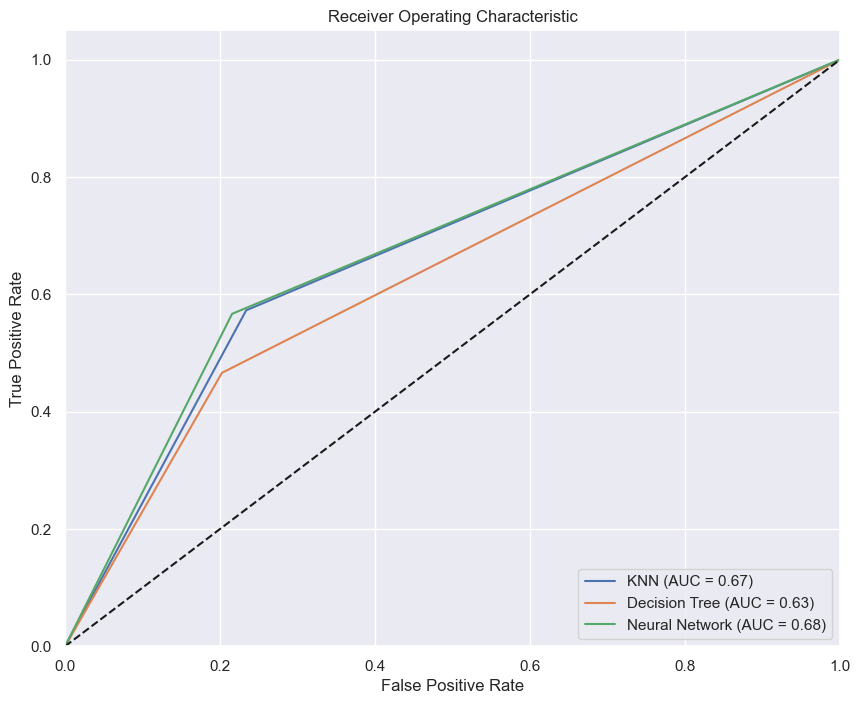

In [116]:

plt.figure(figsize=(10, 8))

# KNN
fpr_knn, tpr_knn, _ = roc_curve(test_labels, test_predictions_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(test_labels, test_predictions_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Neural Network
fpr_nn, tpr_nn, _ = roc_curve(test_labels, binary_test_predictions_keras)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()